## Import Libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Loading and Merging

In [78]:
df1 = pd.read_csv("C:\\Users\\RITVISINGH\\Desktop\\Capstone1_Car Insurance\\InsuranceData\\csv\\Policy features.csv")
df2 = pd.read_csv("C:\\Users\\RITVISINGH\\Desktop\\Capstone1_Car Insurance\\InsuranceData\\csv\\Insurance claim.csv")
merge_df = df1.merge(df2, how='inner')

## Data Cleaning

1) Check Dataset Balance

In [88]:
merge_df['is_claim'].value_counts(normalize=True)


is_claim
0    0.936033
1    0.063967
Name: proportion, dtype: float64

2) Check for Duplicates

In [91]:
merge_df.duplicated().sum()

0

Conclusion:
1) is_claim data is imbalanced featuring 93% people claiming No Insurance, 6.3% people claiming insurance
2) There are no duplicates present.

3. Check for missing values

In [94]:
merge_df.isna().sum()

policy_id               0
policy_tenure          20
age_of_car              5
age_of_policyholder     7
area_cluster            6
population_density     12
is_claim                0
dtype: int64

In [96]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58515 entries, 0 to 58514
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            58515 non-null  object 
 1   policy_tenure        58495 non-null  float64
 2   age_of_car           58510 non-null  float64
 3   age_of_policyholder  58508 non-null  float64
 4   area_cluster         58509 non-null  object 
 5   population_density   58503 non-null  float64
 6   is_claim             58515 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


4. Handling Missing Values

Stratergy:-
1) Policy_id : No missing values
2) policy_tenure : 20 missing values(replace by median)
3) age_of_car : 5 misssing Value(replace by Median)
4) age_of_policyholder : 7 missing values(replace by Median)
5) area_cluster : 6 missing values(Categorical String Variable: Replace by Mode)
6) population_density : 12 missing values(replace by median)
7) insurance_claim : No missing values

In [ ]:
merge_df['policy_tenure'].fillna(merge_df['policy_tenure'].median(),inplace=True)
merge_df['age_of_car'].fillna(merge_df['age_of_car'].median(),inplace=True)
merge_df['age_of_policyholder'].fillna(merge_df['age_of_policyholder'].median(),inplace=True)
merge_df['population_density'].fillna(merge_df['population_density'].median(),inplace=True)

mode_area_cluster = merge_df['area_cluster'].mode()[0]
merge_df['area_cluster'].fillna(mode_area_cluster, inplace=True)

In [115]:
merge_df.isna().sum()

policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
area_cluster           0
population_density     0
is_claim               0
dtype: int64

5. Outlier Detection

In [162]:
def detect_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    print("Q1: ",q1)
    print("Q3: ",q3)
    print("Lower Bound: ",lower_bound)
    print("Upper Bound: ",upper_bound)

numerical_features = ['policy_tenure','age_of_car','age_of_policyholder','population_density']
for i in numerical_features:
    print(i,"\n")
    detect_outliers(merge_df, i)
    print("---------------------")


policy_tenure 

Q1:  0.210301874
Q3:  1.03891587
Lower Bound:  -1.0326191200000001
Upper Bound:  2.281836864
---------------------
age_of_car 

Q1:  0.02
Q3:  0.11
Lower Bound:  -0.115
Upper Bound:  0.245
---------------------
age_of_policyholder 

Q1:  0.365384615
Q3:  0.548076923
Lower Bound:  0.0913461530000001
Upper Bound:  0.8221153849999999
---------------------
population_density 

Q1:  6112.0
Q3:  27003.0
Lower Bound:  -25224.5
Upper Bound:  58339.5
---------------------


In [164]:
def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df[column] = df[column].apply(lambda x: lower_bound if x<lower_bound else (upper_bound if x>upper_bound else x))
    return df
numerical_features = ['policy_tenure','age_of_car','age_of_policyholder','population_density']
for i in numerical_features:
    merge1_df=cap_outliers(merge_df, i)
# merge1_df can be changed to merge_df after verification

## Descreptive Statistics

1. First 5 rows

In [31]:
merge_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990.0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003.0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076.0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622.0,0
4,ID00005,0.596403,0.11,0.634615,C5,34738.0,0


2. Descreptive Statistic

In [120]:
round(merge_df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58515.0,0.61,0.41,0.00,0.21,0.57,1.04,1.4
age_of_car,58515.0,0.07,0.06,0.00,0.02,0.06,0.11,1.0
age_of_policyholder,58515.0,0.47,0.12,0.29,0.37,0.45,0.55,1.0
population_density,58515.0,18826.50,17659.83,290.00,6112.00,8794.00,27003.00,73430.0
is_claim,58515.0,0.06,0.24,0.00,0.00,0.00,0.00,1.0


## Visualize Distribution

1. Histogram Plotting for visualising numerical categories

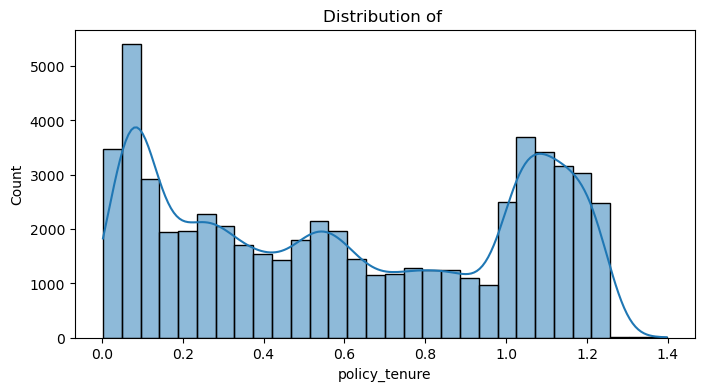

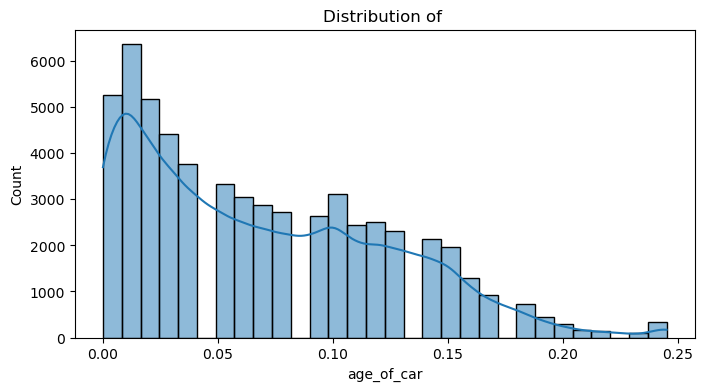

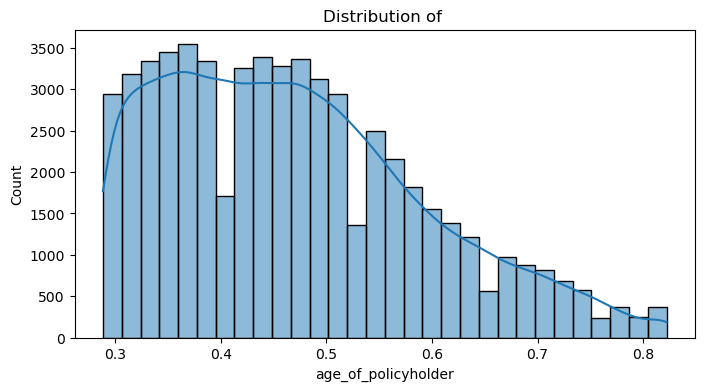

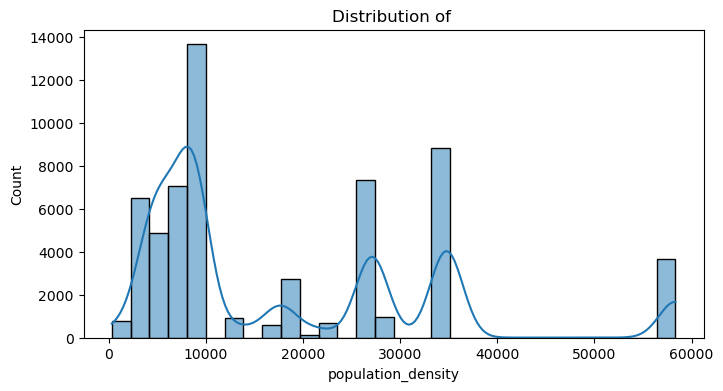

In [172]:
numerical_features = ['policy_tenure','age_of_car','age_of_policyholder','population_density']
for i in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(merge_df[i],kde=True, bins=30)
    plt.title('Distribution of ')
    plt.show()

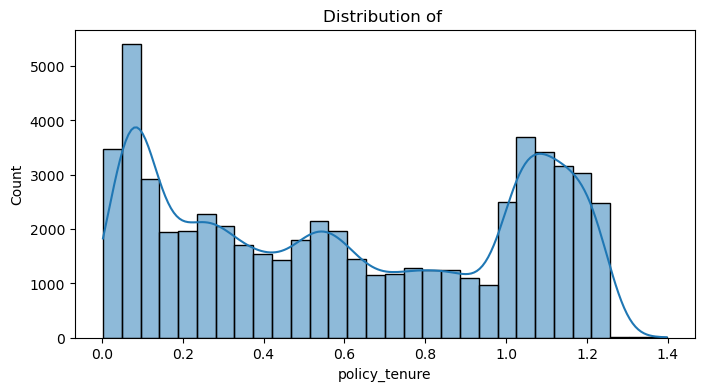

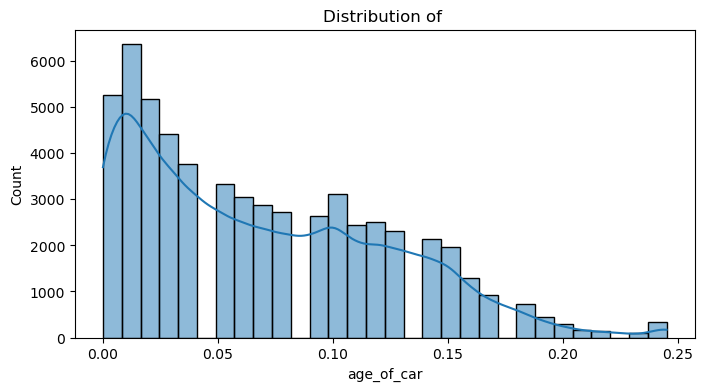

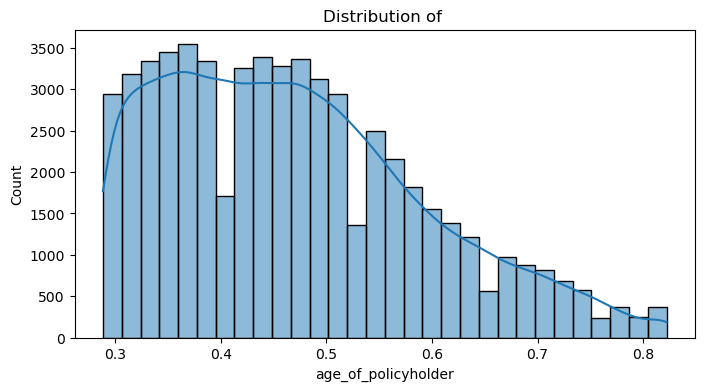

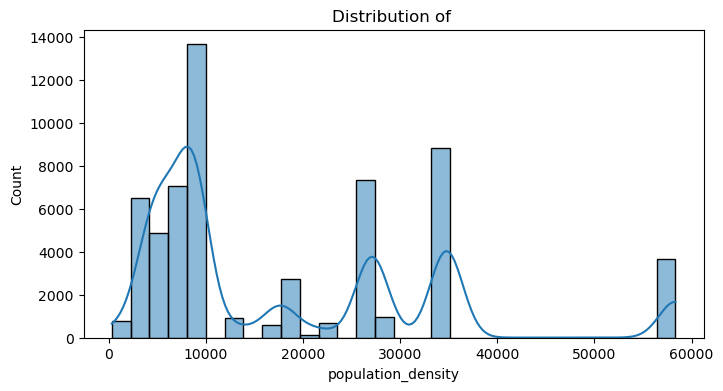

In [176]:
numerical_features = ['policy_tenure','age_of_car','age_of_policyholder','population_density']
for i in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(merge1_df[i],kde=True, bins=30)
    plt.title('Distribution of ')
    plt.show()

In [153]:
merge_df.pivot_table(index='area_cluster', columns='is_claim', aggfunc='size',fill_value=0).rename(columns={0:'No Claim',1:'Claim'})


is_claim,No Claim,Claim
area_cluster,,
C1,1389,75
C10,3004,148
C11,1138,72
C12,1501,86
C13,3224,194
C14,3371,281
C15,733,38
C16,377,23
C17,473,19


<Axes: xlabel='area_cluster', ylabel='count'>

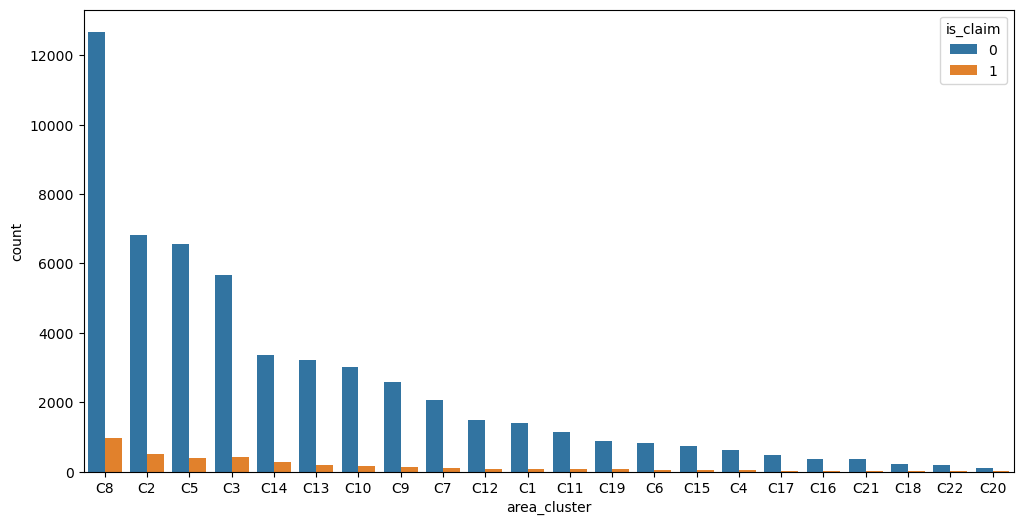

In [145]:
plt.figure(figsize=(12,6))
sns.countplot(data=merge_df, x='area_cluster', hue='is_claim', order=merge_df['area_cluster'].value_counts().index)

<Axes: xlabel='area_cluster'>

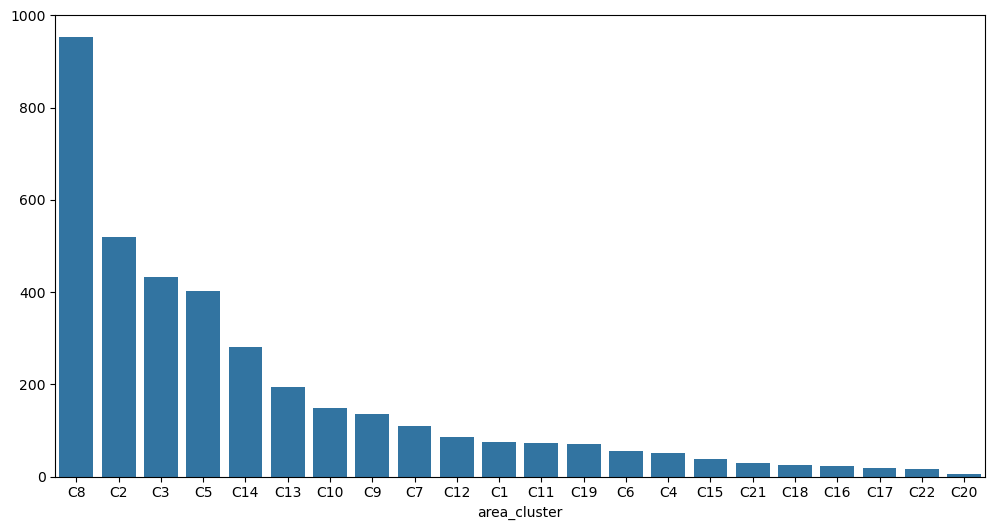

In [151]:
claim_df = merge_df[merge_df['is_claim']==1]
area_claim_counts = claim_df['area_cluster'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=area_claim_counts.index, y=area_claim_counts.values)

In [ ]:
-----------------------------------------------------------------------------------------------------

In [122]:
x=merge_df[['area_cluster','population_density']]
x

,area_cluster,population_density
0,C1,4990.0
1,C2,27003.0
2,C3,4076.0
3,C4,21622.0
4,C5,34738.0
...,...,...
58510,C10,73430.0
58511,C8,8794.0
58512,C10,73430.0
58513,C11,6108.0


In [11]:
merge_clu=merge_df.query('is_claim==1')
merge_clu


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
12,ID00013,0.045834,0.03,0.480769,C3,4076.0,1
19,ID00020,0.758623,0.09,0.394231,C5,34738.0,1
21,ID00022,0.527085,0.00,0.615385,C4,21622.0,1
23,ID00024,0.999443,0.08,0.576923,C2,27003.0,1
24,ID00025,0.020563,0.01,0.480769,C8,8794.0,1
...,...,...,...,...,...,...,...
58426,ID58427,0.451904,0.05,0.288462,C2,27003.0,1
58467,ID58468,0.060200,0.12,0.567308,C3,4076.0,1
58473,ID58474,1.180183,0.18,0.471154,C14,7788.0,1
58481,ID58482,1.031958,0.03,0.625000,C3,4076.0,1


#

In [17]:
merge_clu.groupby('area_cluster').agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False)

,is_claim
area_cluster,
C8,953
C2,520
C3,433
C5,402
C14,281
C13,194
C10,148
C9,136
C7,109


<Axes: title={'center': 'age_of_policyholder'}, xlabel='is_claim'>

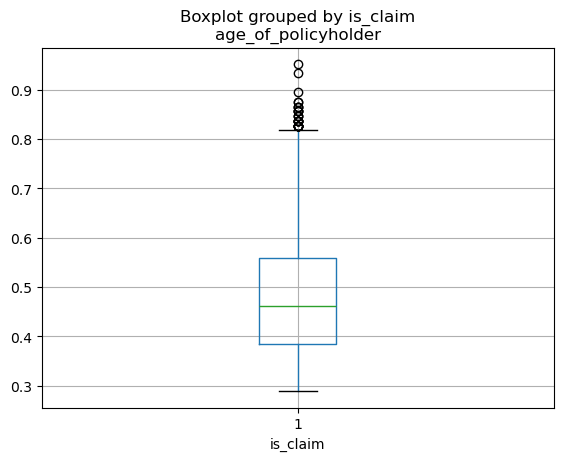

In [13]:
merge_clu.boxplot(by='is_claim', column=['age_of_policyholder'])

In [93]:
def readings():
    q1=merge_clu.age_of_policyholder.quantile(0.25)
    q3=merge_clu.age_of_policyholder.quantile(0.75)
    iqr=q3-q1
    out_lower=q1-1.5*(iqr)
    out_upper=q3+1.5*(iqr)
    print(q1)
    print(q3)
    print(out_lower)
    print(out_upper)

0.384615385
0.557692308
0.12500000049999987
0.8173076925000001


<Axes: title={'center': 'age_of_car'}, xlabel='is_claim'>

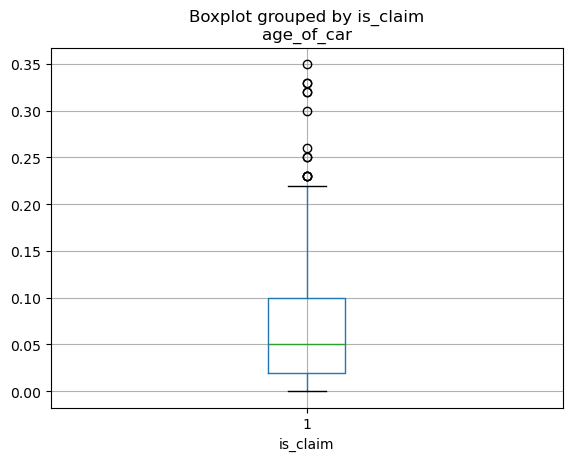

In [95]:
merge_clu.boxplot(by='is_claim', column=['age_of_car'])

In [99]:
q1=merge_clu.age_of_car.quantile(0.25)
q3=merge_clu.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)

0.02
0.1
-0.09999999999999999
0.22


In [49]:
merge_obs = merge_df[['area_cluster','population_density']]
merge_obs.drop_duplicates(subset='area_cluster').sort_values(by='population_density', ascending=False)

,area_cluster,population_density
13,C10,73430.0
116,C17,65567.0
135,C18,35036.0
30,C12,34791.0
4,C5,34738.0
193,C19,27742.0
1,C2,27003.0
3,C4,21622.0
264,C20,20905.0
9,C9,17804.0


In [50]:
merge_clu8=merge_clu[(merge_clu['area_cluster']=='C8')]
merge_clu8

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
24,ID00025,0.020563,0.01,0.480769,C8,8794.0,1
29,ID00030,1.124538,0.07,0.490385,C8,8794.0,1
185,ID00186,1.200765,0.17,0.326923,C8,8794.0,1
192,ID00193,1.087890,0.12,0.480769,C8,8794.0,1
288,ID00289,0.270751,0.16,0.596154,C8,8794.0,1
...,...,...,...,...,...,...,...
58240,ID58241,1.222264,0.03,0.586538,C8,8794.0,1
58241,ID58242,0.350716,0.09,0.490385,C8,8794.0,1
58320,ID58321,1.202398,0.02,0.701923,C8,8794.0,1
58357,ID58358,1.013757,0.04,0.509615,C8,8794.0,1


0.403846154
0.586538462
0.12980769199999997
0.8605769240000001
0.04
0.12
-0.07999999999999999
0.24


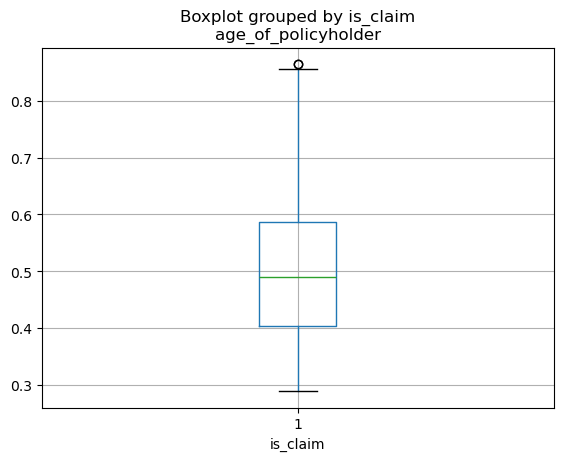

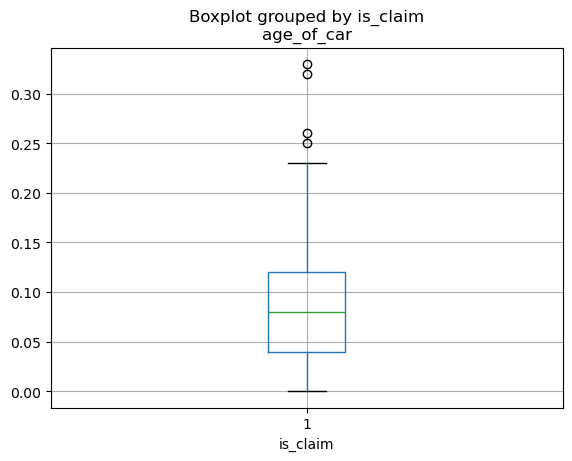

In [127]:
#age of policyholder
merge_clu8.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu8.age_of_policyholder.quantile(0.25)
q3=merge_clu8.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_policyholder.append([q1,q3])
#age of car
merge_clu8.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu8.age_of_car.quantile(0.25)
q3=merge_clu8.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_car.append([q1,q3])

<Axes: title={'center': 'age_of_policyholder'}, xlabel='is_claim'>

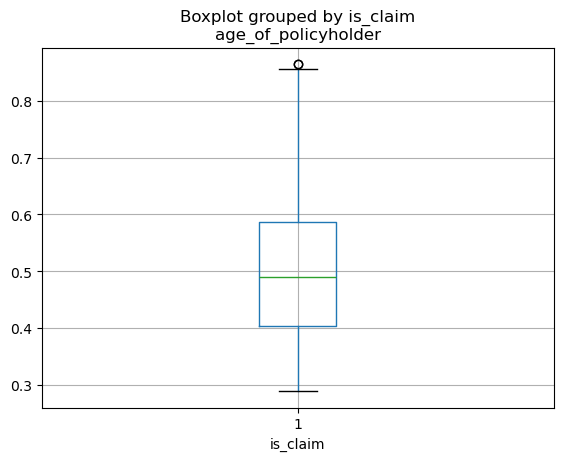

In [129]:
merge_clu8.boxplot(by='is_claim', column=['age_of_policyholder'])

<Axes: title={'center': 'age_of_car'}, xlabel='is_claim'>

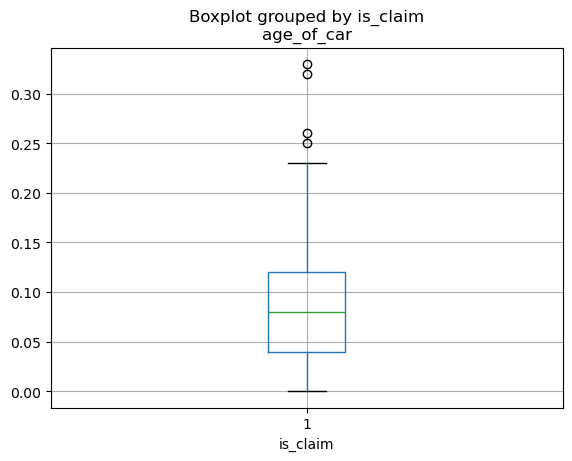

In [131]:
merge_clu8.boxplot(by='is_claim', column=['age_of_car'])

In [141]:
merge_clu2=merge_clu[(merge_clu['area_cluster']=='C2')]
merge_clu2

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
23,ID00024,0.999443,0.08,0.576923,C2,27003.0,1
152,ID00153,1.237961,0.12,0.442308,C2,27003.0,1
334,ID00335,0.951400,0.11,0.528846,C2,27003.0,1
390,ID00391,1.045773,0.01,0.394231,C2,27003.0,1
482,ID00483,1.142420,0.10,0.634615,C2,27003.0,1
...,...,...,...,...,...,...,...
58013,ID58014,1.040412,0.13,0.375000,C2,27003.0,1
58138,ID58139,0.175493,0.10,0.461538,C2,27003.0,1
58257,ID58258,0.791147,0.15,0.855769,C2,27003.0,1
58282,ID58283,1.067301,0.02,0.480769,C2,27003.0,1


0.375
0.519230769
0.15865384650000003
0.7355769225
0.02
0.11
-0.115
0.245


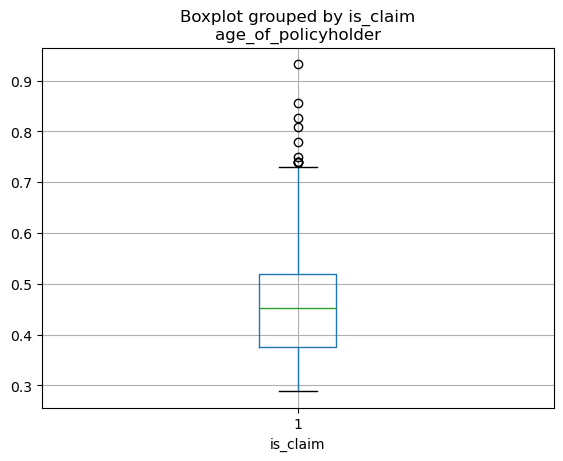

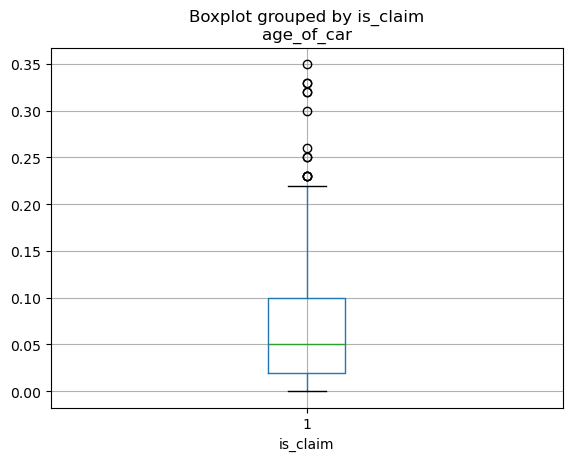

In [143]:
#age of policyholder
merge_clu2.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu2.age_of_policyholder.quantile(0.25)
q3=merge_clu2.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_policyholder.append([q1,q3])

#age of car
merge_clu.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu2.age_of_car.quantile(0.25)
q3=merge_clu2.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_car.append([q1,q3])

<Axes: title={'center': 'age_of_policyholder'}, xlabel='is_claim'>

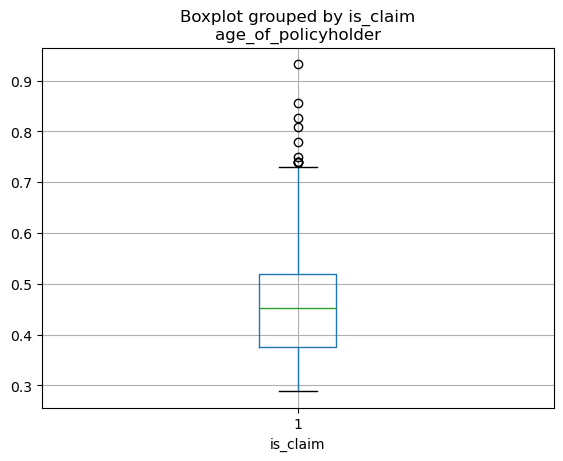

In [54]:
merge_clu2.boxplot(by='is_claim', column=['age_of_policyholder'])

<Axes: title={'center': 'age_of_car'}, xlabel='is_claim'>

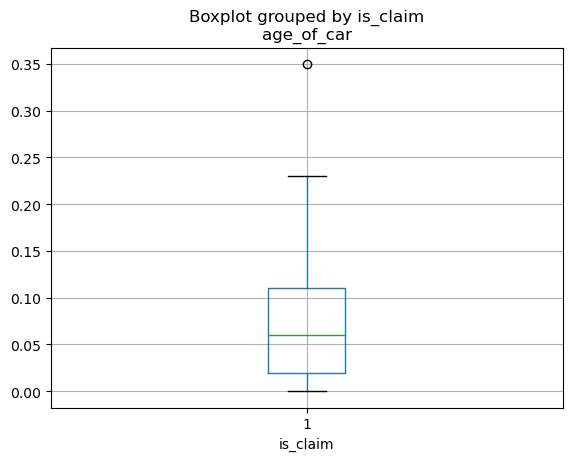

In [55]:
merge_clu2.boxplot(by='is_claim', column=['age_of_car'])

In [56]:
merge_clu3=merge_clu[(merge_clu['area_cluster']=='C3')]
merge_clu3

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
12,ID00013,0.045834,0.03,0.480769,C3,4076.0,1
431,ID00432,0.188299,0.00,0.509615,C3,4076.0,1
480,ID00481,0.976286,0.02,0.355769,C3,4076.0,1
636,ID00637,0.137877,0.12,0.451923,C3,4076.0,1
672,ID00673,0.535971,0.05,0.298077,C3,4076.0,1
...,...,...,...,...,...,...,...
58078,ID58079,1.074492,0.11,0.615385,C3,4076.0,1
58325,ID58326,1.013301,0.02,0.653846,C3,4076.0,1
58424,ID58425,0.347317,0.06,0.288462,C3,4076.0,1
58467,ID58468,0.060200,0.12,0.567308,C3,4076.0,1


0.355769231
0.538461538
0.0817307705000001
0.8124999984999999
0.0
0.07
-0.10500000000000001
0.17500000000000002


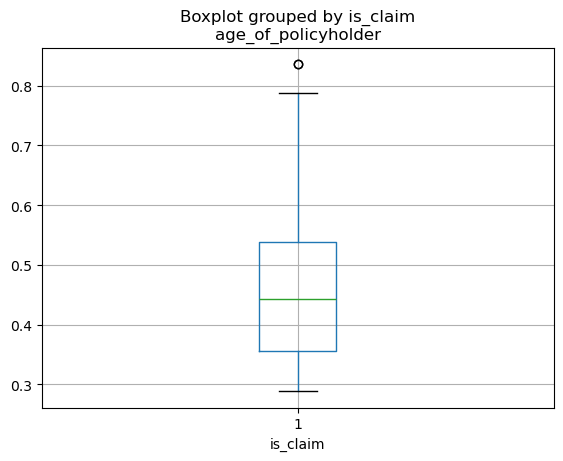

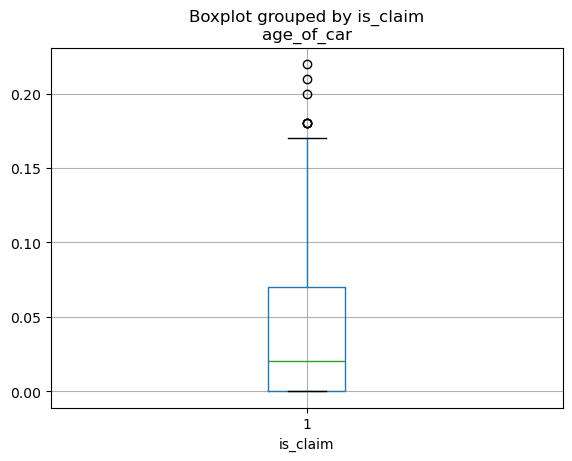

In [145]:
#age of policyholder
merge_clu3.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu3.age_of_policyholder.quantile(0.25)
q3=merge_clu3.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_policyholder.append([q1,q3])


#age of car
merge_clu3.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu3.age_of_car.quantile(0.25)
q3=merge_clu3.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_car.append([q1,q3])

<Axes: title={'center': 'age_of_policyholder'}, xlabel='is_claim'>

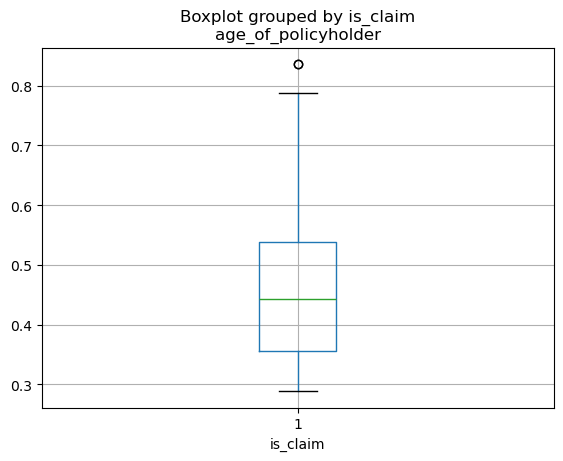

In [57]:
merge_clu3.boxplot(by='is_claim', column=['age_of_policyholder'])

In [149]:
#delete later
print(range_age_of_policyholder)
print(range_age_of_car)

[[0.403846154, 0.586538462], [0.375, 0.519230769], [0.355769231, 0.538461538]]
[[0.04, 0.12], [0.02, 0.11], [0.0, 0.07]]


<Axes: title={'center': 'age_of_car'}, xlabel='is_claim'>

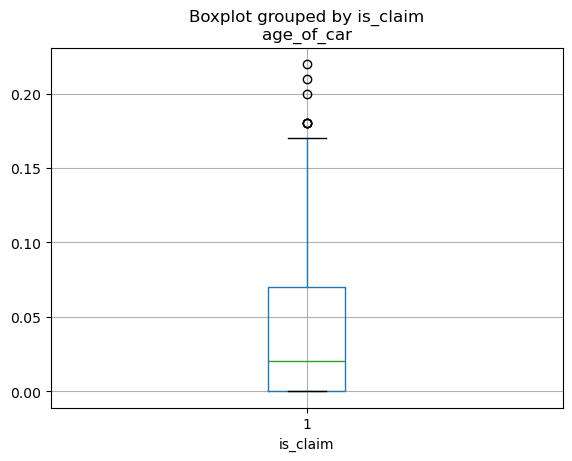

In [58]:
merge_clu3.boxplot(by='is_claim', column=['age_of_car'])

In [59]:
merge_clu5=merge_clu[(merge_clu['area_cluster']=='C5')]
merge_clu5

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
19,ID00020,0.758623,0.09,0.394231,C5,34738.0,1
196,ID00197,1.218566,0.03,0.567308,C5,34738.0,1
370,ID00371,0.031688,0.00,0.432692,C5,34738.0,1
415,ID00416,1.165207,0.03,0.567308,C5,34738.0,1
486,ID00487,0.011484,0.00,0.442308,C5,34738.0,1
...,...,...,...,...,...,...,...
57319,ID57320,1.098456,0.02,0.451923,C5,34738.0,1
57594,ID57595,1.070237,0.13,0.451923,C5,34738.0,1
57812,ID57813,0.337620,0.01,0.519231,C5,34738.0,1
57855,ID57856,0.533188,0.01,0.615385,C5,34738.0,1


0.375
0.567307692
0.08653846200000004
0.8557692299999999
0.01
0.09
-0.11
0.21


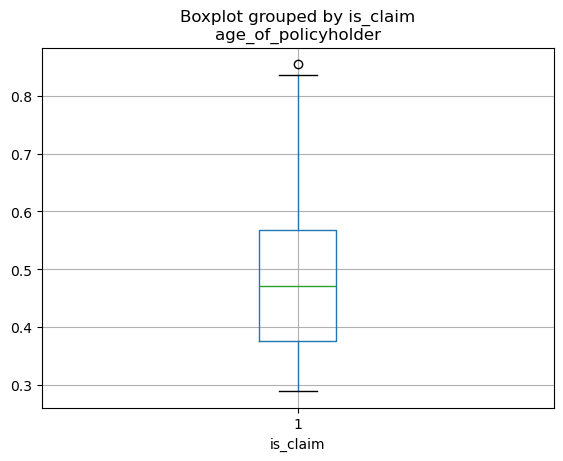

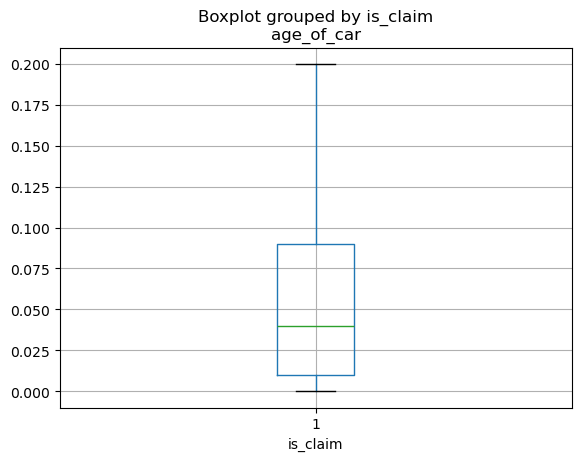

In [151]:
#age of policyholder
merge_clu5.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu5.age_of_policyholder.quantile(0.25)
q3=merge_clu5.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_policyholder.append([q1,q3])

#age of car
merge_clu5.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu5.age_of_car.quantile(0.25)
q3=merge_clu5.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_car.append([q1,q3])

<Axes: title={'center': 'age_of_car'}, xlabel='is_claim'>

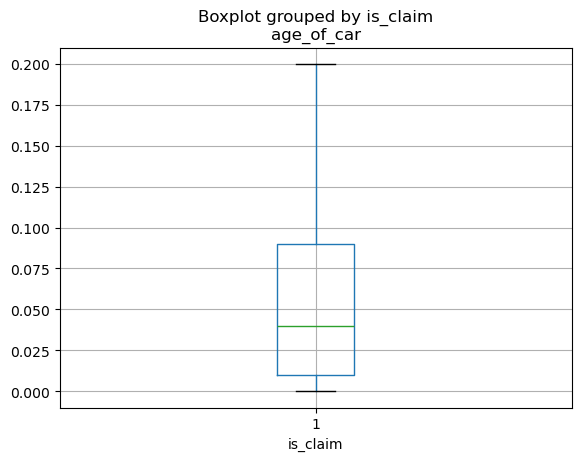

In [60]:
merge_clu5.boxplot(by='is_claim', column=['age_of_car'])

<Axes: title={'center': 'age_of_policyholder'}, xlabel='is_claim'>

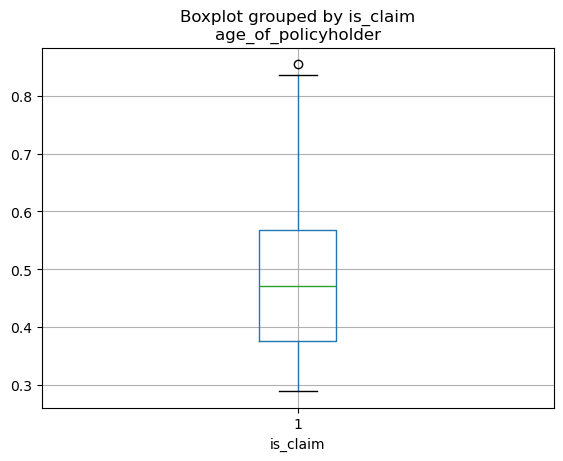

In [61]:
merge_clu5.boxplot(by='is_claim', column=['age_of_policyholder'])

      policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
379     ID00380       0.517833        0.14             0.384615          C14   
446     ID00447       0.258100        0.06             0.298077          C14   
616     ID00617       1.148874        0.04             0.673077          C14   
726     ID00727       1.117442        0.08             0.480769          C14   
816     ID00817       0.309389        0.12             0.500000          C14   
...         ...            ...         ...                  ...          ...   
57900   ID57901       0.747988        0.09             0.375000          C14   
58022   ID58023       1.078940        0.03             0.326923          C14   
58184   ID58185       1.054859        0.02             0.701923          C14   
58302   ID58303       1.221284        0.17             0.788462          C14   
58473   ID58474       1.180183        0.18             0.471154          C14   

       population_density  is_claim  
3

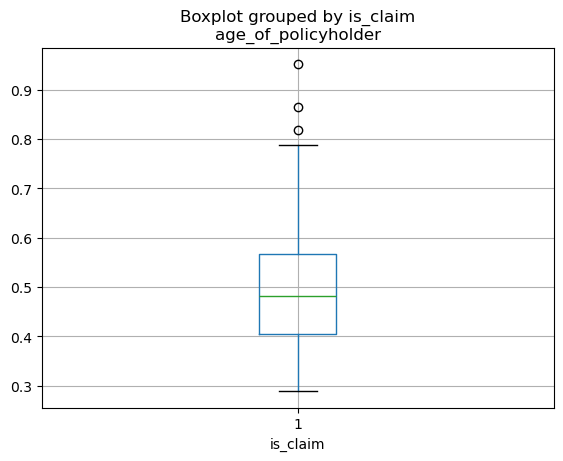

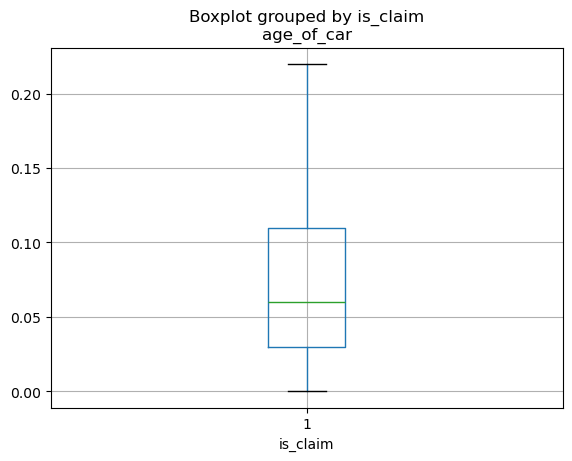

In [153]:
merge_clu14=merge_clu[(merge_clu['area_cluster']=='C14')]
print(merge_clu14)
#age of policyholder
merge_clu14.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu14.age_of_policyholder.quantile(0.25)
q3=merge_clu14.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_policyholder.append([q1,q3])

#age of car
merge_clu14.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu14.age_of_car.quantile(0.25)
q3=merge_clu14.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_car.append([q1,q3])

      policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
512     ID00513       0.006727        0.00             0.730769          C13   
664     ID00665       0.956948        0.04             0.298077          C13   
830     ID00831       1.175974        0.05             0.288462          C13   
942     ID00943       1.087139        0.18             0.509615          C13   
993     ID00994       1.105373        0.02             0.711538          C13   
...         ...            ...         ...                  ...          ...   
57148   ID57149       0.845365        0.08             0.500000          C13   
57196   ID57197       0.684970        0.00             0.759615          C13   
57223   ID57224       1.082378        0.15             0.557692          C13   
57683   ID57684       1.035269        0.07             0.403846          C13   
58212   ID58213       1.120656        0.10             0.288462          C13   

       population_density  is_claim  
5

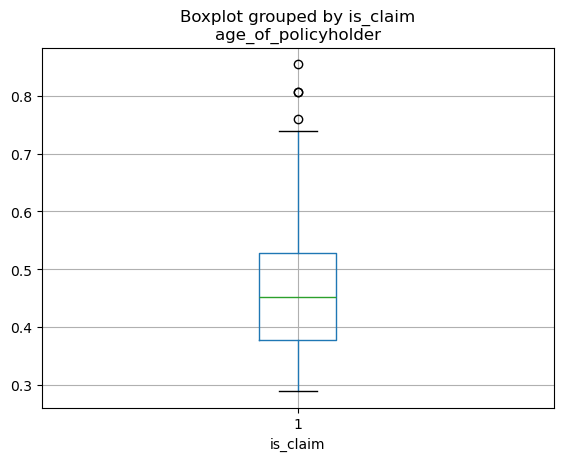

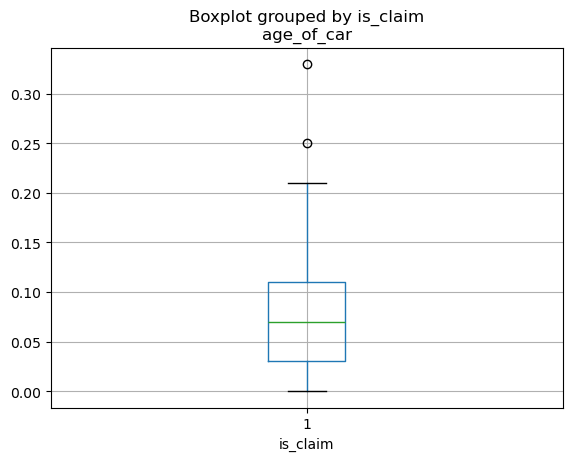

In [155]:
merge_clu13=merge_clu[(merge_clu['area_cluster']=='C13')]
print(merge_clu13)
#age of policyholder
merge_clu13.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu13.age_of_policyholder.quantile(0.25)
q3=merge_clu13.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_policyholder.append([q1,q3])

#age of car
merge_clu13.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu13.age_of_car.quantile(0.25)
q3=merge_clu13.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_car.append([q1,q3])

      policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
462     ID00463       0.010555        0.00             0.298077          C10   
609     ID00610       0.092302        0.04             0.673077          C10   
798     ID00799       0.272786        0.00             0.432692          C10   
883     ID00884       1.162726        0.05             0.298077          C10   
1898    ID01899       0.509486        0.02             0.336538          C10   
...         ...            ...         ...                  ...          ...   
55701   ID55702       0.084963        0.02             0.336538          C10   
55847   ID55848       0.040828        0.00             0.538462          C10   
56182   ID56183       0.711373        0.00             0.778846          C10   
57560   ID57561       0.399518        0.00             0.576923          C10   
58048   ID58049       0.415633        0.02             0.567308          C10   

       population_density  is_claim  
4

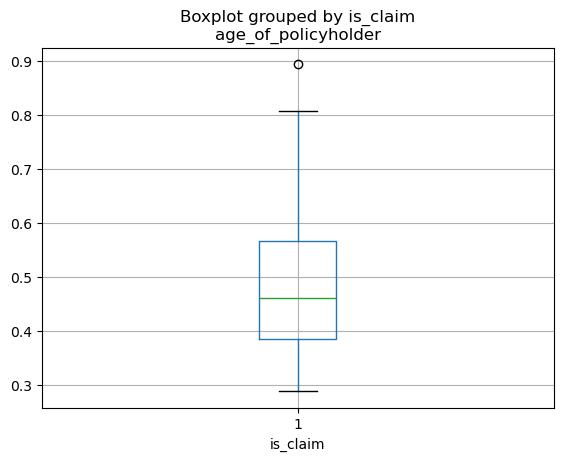

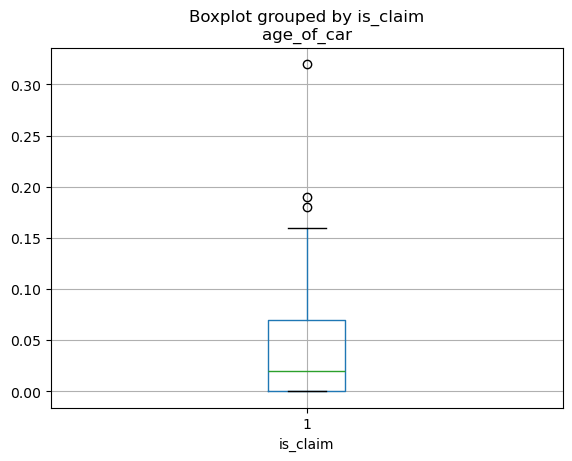

In [121]:
merge_clu10=merge_clu[(merge_clu['area_cluster']=='C10')]
print(merge_clu10)
#age of policyholder
merge_clu10.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu10.age_of_policyholder.quantile(0.25)
q3=merge_clu10.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)

#age of car
merge_clu10.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu10.age_of_car.quantile(0.25)
q3=merge_clu10.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)

      policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
688     ID00689       1.084156        0.01             0.375000           C9   
717     ID00718       1.016751        0.06             0.471154           C9   
748     ID00749       0.344448        0.00             0.432692           C9   
1489    ID01490       0.595478        0.02             0.567308           C9   
2774    ID02775       0.071806        0.00             0.509615           C9   
...         ...            ...         ...                  ...          ...   
55995   ID55996       0.152383        0.01             0.365385           C9   
56132   ID56133       0.102183        0.15             0.317308           C9   
56642   ID56643       0.287213        0.10             0.480769           C9   
57614   ID57615       0.375871        0.07             0.326923           C9   
57822   ID57823       1.096942        0.05             0.557692           C9   

       population_density  is_claim  
6

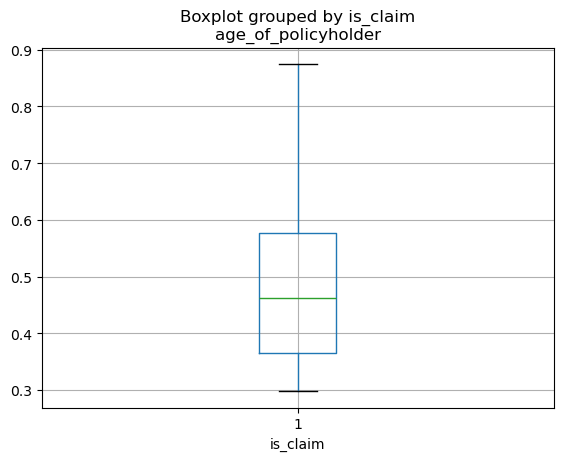

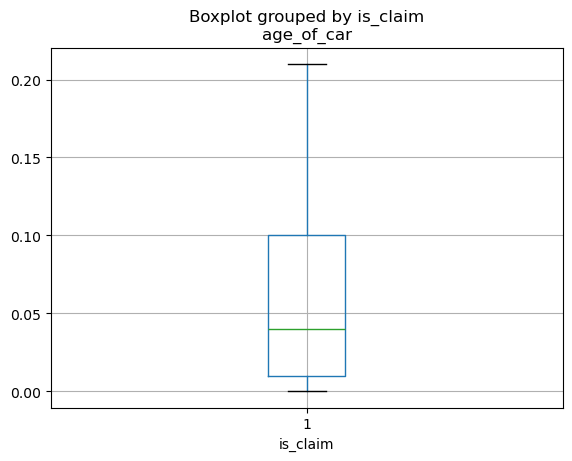

In [157]:
merge_clu9=merge_clu[(merge_clu['area_cluster']=='C9')]
print(merge_clu9)
#age of policyholder
merge_clu9.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu9.age_of_policyholder.quantile(0.25)
q3=merge_clu9.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_policyholder.append([q1,q3])

#age of car
merge_clu9.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu9.age_of_car.quantile(0.25)
q3=merge_clu9.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_car.append([q1,q3])

      policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
799     ID00800       1.000030        0.09             0.307692           C7   
1337    ID01338       0.855055        0.03             0.346154           C7   
1695    ID01696       1.023328        0.02             0.490385           C7   
2129    ID02130       0.990508        0.17             0.432692           C7   
2738    ID02739       1.209938        0.03             0.365385           C7   
...         ...            ...         ...                  ...          ...   
55527   ID55528       0.541729        0.05             0.605769           C7   
56625   ID56626       0.706489        0.07             0.413462           C7   
56753   ID56754       0.569304        0.09             0.480769           C7   
57870   ID57871       0.691587        0.09             0.394231           C7   
57916   ID57917       1.166556        0.14             0.413462           C7   

       population_density  is_claim  
7

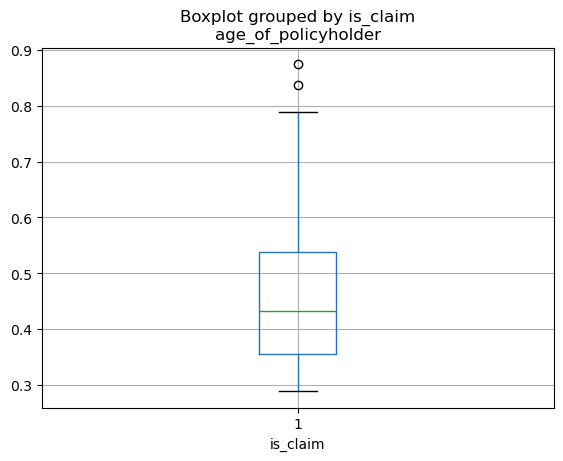

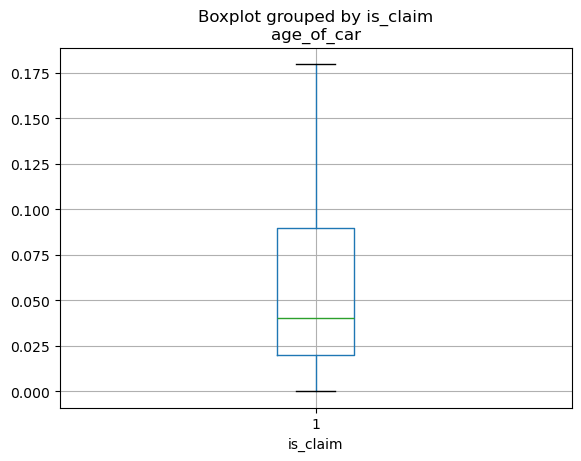

In [159]:
merge_clu7=merge_clu[(merge_clu['area_cluster']=='C7')]
print(merge_clu7)
#age of policyholder
merge_clu7.boxplot(by='is_claim', column=['age_of_policyholder'])
####
q1=merge_clu7.age_of_policyholder.quantile(0.25)
q3=merge_clu7.age_of_policyholder.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_policyholder.append([q1,q3])

#age of car
merge_clu7.boxplot(by='is_claim', column=['age_of_car'])
###########
q1=merge_clu7.age_of_car.quantile(0.25)
q3=merge_clu7.age_of_car.quantile(0.75)
iqr=q3-q1
out_lower=q1-1.5*(iqr)
out_upper=q3+1.5*(iqr)
print(q1)
print(q3)
print(out_lower)
print(out_upper)
range_age_of_car.append([q1,q3])

In [161]:
print(range_age_of_policyholder)
print(range_age_of_car)

[[0.403846154, 0.586538462], [0.375, 0.519230769], [0.355769231, 0.538461538], [0.375, 0.567307692], [0.403846154, 0.567307692], [0.37740384625, 0.528846154], [0.365384615, 0.576923077], [0.355769231, 0.538461538]]
[[0.04, 0.12], [0.02, 0.11], [0.0, 0.07], [0.01, 0.09], [0.03, 0.11], [0.03, 0.11], [0.01, 0.1], [0.02, 0.09]]


In [171]:
def x(lst):
    x1=0
    y1=0
    ctr=1
    for i in range (0,len(lst)):
        x1+=lst[i][0]
        y1+=lst[i][1]
        ctr+=1
    z=[]
    z.append(x1/ctr)
    z.append(y1/ctr)
    return z
print(x(range_age_of_policyholder))
print(x(range_age_of_car))

[0.29478276357098765, 0.433523266691358]
[0.01382716049382716, 0.07703703703703703]
